In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns
import numpy as np
plt.style.use('seaborn-v0_8-bright')
import calplot
import folium
from sklearn.linear_model import LinearRegression

In [8]:
result = pd.read_csv("result.csv")

In [9]:
result.head()

game_id  season  week     gameday weekday  wind  temp home_team  \
0   2000_01_SF_ATL    2000     1  2000-09-03  Sunday   NaN   NaN       ATL   
1  2000_01_JAX_CLE    2000     1  2000-09-03  Sunday   6.0  78.0       CLE   
2   2000_01_IND_KC    2000     1  2000-09-03  Sunday   5.0  90.0        KC   
3  2000_01_CHI_MIN    2000     1  2000-09-03  Sunday   NaN   NaN       MIN   
4    2000_01_TB_NE    2000     1  2000-09-03  Sunday   5.0  71.0        NE   

  away_team  home_score  ...         team team_name weekly_attendance  \
0        SF        36.0  ...      Atlanta   Falcons           54626.0   
1       JAX         7.0  ...    Cleveland    Browns           72418.0   
2       IND        14.0  ...  Kansas City    Chiefs           78357.0   
3       CHI        30.0  ...    Minnesota   Vikings           64104.0   
4        TB        16.0  ...  New England  Patriots           60292.0   

  last_name  team_abbr      Team  longitude   latitude  winning_team  \
0   Falcons        ATL   Falcons -84.400972  33.757614           ATL   
1    Browns        CLE    Browns -81.699564  41.506022           JAX   
2    Chiefs         KC    Chiefs -94.484039  39.048914           IND   
3   Vikings        MIN   Vikings -93.258094  44.973881           MIN   
4  Patriots         NE  Patriots -71.264350  42.090925            TB   

   home_team_win  
0           True  
1          False  
2          False  
3           True  
4          False  

[5 rows x 22 columns]

In [50]:
result["gameday"] = pd.to_datetime(result['gameday'])


In [64]:
result['season'] = pd.to_datetime(result['season'], format='%Y')



## Stadiums

In [15]:
import folium
import pandas as pd


# Create a map
map = folium.Map(location=[40.7128, -74.0060], zoom_start=5)

# Add points
for i, row in result.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=row['weekly_attendance']/9000, # Example scaling
                        popup=f"{row['stadium']}: {row['weekly_attendance']} attendees",
                        color='blue', fill=True).add_to(map)

map

In [21]:
# Load your dataset
import plotly.express as px
# Calculate average attendance for each stadium
average_attendance = result.groupby('stadium')['weekly_attendance'].mean().reset_index()

# Sort the data by average attendance to make the chart more readable
average_attendance = average_attendance.sort_values(by='weekly_attendance', ascending=False)

# Create the bar chart using Plotly Express
fig = px.bar(average_attendance, y='stadium', x='weekly_attendance', 
             title='Average Weekly Attendance by Stadium',
             labels={'weekly_attendance': 'Average Attendance', 'stadium': 'Stadium'},
             color='weekly_attendance',  # Color bars by attendance, creating a gradient effect
             height=600)  # Adjust the height of the figure to fit all bars

# Show the plot
fig.show()

In [68]:
result

game_id     season  week    gameday weekday  wind  temp  \
0      2000_01_SF_ATL 2000-01-01     1 2000-09-03  Sunday   NaN   NaN   
1     2000_01_JAX_CLE 2000-01-01     1 2000-09-03  Sunday   6.0  78.0   
2      2000_01_IND_KC 2000-01-01     1 2000-09-03  Sunday   5.0  90.0   
3     2000_01_CHI_MIN 2000-01-01     1 2000-09-03  Sunday   NaN   NaN   
4       2000_01_TB_NE 2000-01-01     1 2000-09-03  Sunday   5.0  71.0   
...               ...        ...   ...        ...     ...   ...   ...   
4515  2019_17_TEN_HOU 2019-01-01    17 2019-12-29  Sunday   NaN   NaN   
4516  2019_17_IND_JAX 2019-01-01    17 2019-12-29  Sunday   NaN   NaN   
4517   2019_17_ARI_LA 2019-01-01    17 2019-12-29  Sunday   0.0  62.0   
4518  2019_17_PHI_NYG 2019-01-01    17 2019-12-29  Sunday   5.0  42.0   
4519   2019_17_SF_SEA 2019-01-01    17 2019-12-29  Sunday   3.0  51.0   

     home_team away_team  home_score  ...  team_name weekly_attendance  \
0          ATL        SF        36.0  ...    Falcons           54626.0   
1          CLE       JAX         7.0  ...     Browns           72418.0   
2           KC       IND        14.0  ...     Chiefs           78357.0   
3          MIN       CHI        30.0  ...    Vikings           64104.0   
4           NE        TB        16.0  ...   Patriots           60292.0   
...        ...       ...         ...  ...        ...               ...   
4515       HOU       TEN        14.0  ...     Texans           71794.0   
4516       JAX       IND        38.0  ...    Jaguars           58472.0   
4517        LA       ARI        31.0  ...       Rams           68665.0   
4518       NYG       PHI        17.0  ...     Giants           75029.0   
4519       SEA        SF        21.0  ...   Seahawks           69162.0   

     last_name team_abbr      Team   longitude   latitude winning_team  \
0      Falcons       ATL   Falcons  -84.400972  33.757614          ATL   
1       Browns       CLE    Browns  -81.699564  41.506022          JAX   
2       Chiefs        KC    Chiefs  -94.484039  39.048914          IND   
3      Vikings       MIN   Vikings  -93.258094  44.973881          MIN   
4     Patriots        NE  Patriots  -71.264350  42.090925           TB   
...        ...       ...       ...         ...        ...          ...   
4515    Texans       HOU    Texans  -95.410956  29.684781          TEN   
4516   Jaguars       JAX   Jaguars  -81.637356  30.323925          JAX   
4517      Rams        LA      Rams  -90.188547  38.632975           LA   
4518    Giants       NYG    Giants  -74.076983  40.812194          PHI   
4519  Seahawks       SEA  Seahawks -122.331625  47.595153           SF   

      home_team_win      month  
0              True  September  
1             False  September  
2             False  September  
3              True  September  
4             False  September  
...             ...        ...  
4515          False   December  
4516           True   December  
4517           True   December  
4518          False   December  
4519          False   December  

[4520 rows x 23 columns]

In [75]:

#week
week_counts = result.groupby('week')['weekly_attendance'].mean().reset_index().rename(columns={'weekly_attendance': 'Average Attendance'})

#weekday
weekday_counts = result.groupby('weekday')['weekly_attendance'].mean().reset_index().rename(columns={'weekly_attendance': 'Average Attendance'})
weekdays_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts["weekday"] = pd.Categorical(weekday_counts["weekday"], categories=weekdays_ordered, ordered=True)

#month
result["month"] = result["gameday"].dt.month_name()
month_counts = result.groupby('month')['weekly_attendance'].mean().reset_index().rename(columns={'weekly_attendance': 'Average Attendance'})
months_ordered = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
month_counts["month"] = pd.Categorical(month_counts["month"], categories=months_ordered, ordered=True)
month_counts = month_counts.sort_values(by=["month", "Average Attendance"])

#year
year_counts = result.groupby('season')['weekly_attendance'].mean().reset_index().rename(columns={'weekly_attendance': 'Average Attendance'})

#temp 
temp_counts = result.groupby('temp')['weekly_attendance'].mean().reset_index().rename(columns={'weekly_attendance': 'Average Attendance'})


In [77]:
year_counts['season']

season  Average Attendance
0  2000-01-01        66599.074074
1  2001-01-01        65991.990741
2  2002-01-01        66648.281250
3  2003-01-01        67264.772321
4  2004-01-01        68333.517857
5  2005-01-01        68379.638393
6  2006-01-01        69371.602679
7  2007-01-01        69384.866071
8  2008-01-01        68893.165179
9  2009-01-01        68587.700893
10 2010-01-01        68033.058036
11 2011-01-01        68079.321429
12 2012-01-01        68531.758929
13 2013-01-01        69552.941964
14 2014-01-01        69649.620536
15 2015-01-01        69215.790179
16 2016-01-01        70171.271552
17 2017-01-01        67629.720833
18 2018-01-01        67337.658333
19 2019-01-01        66872.020833

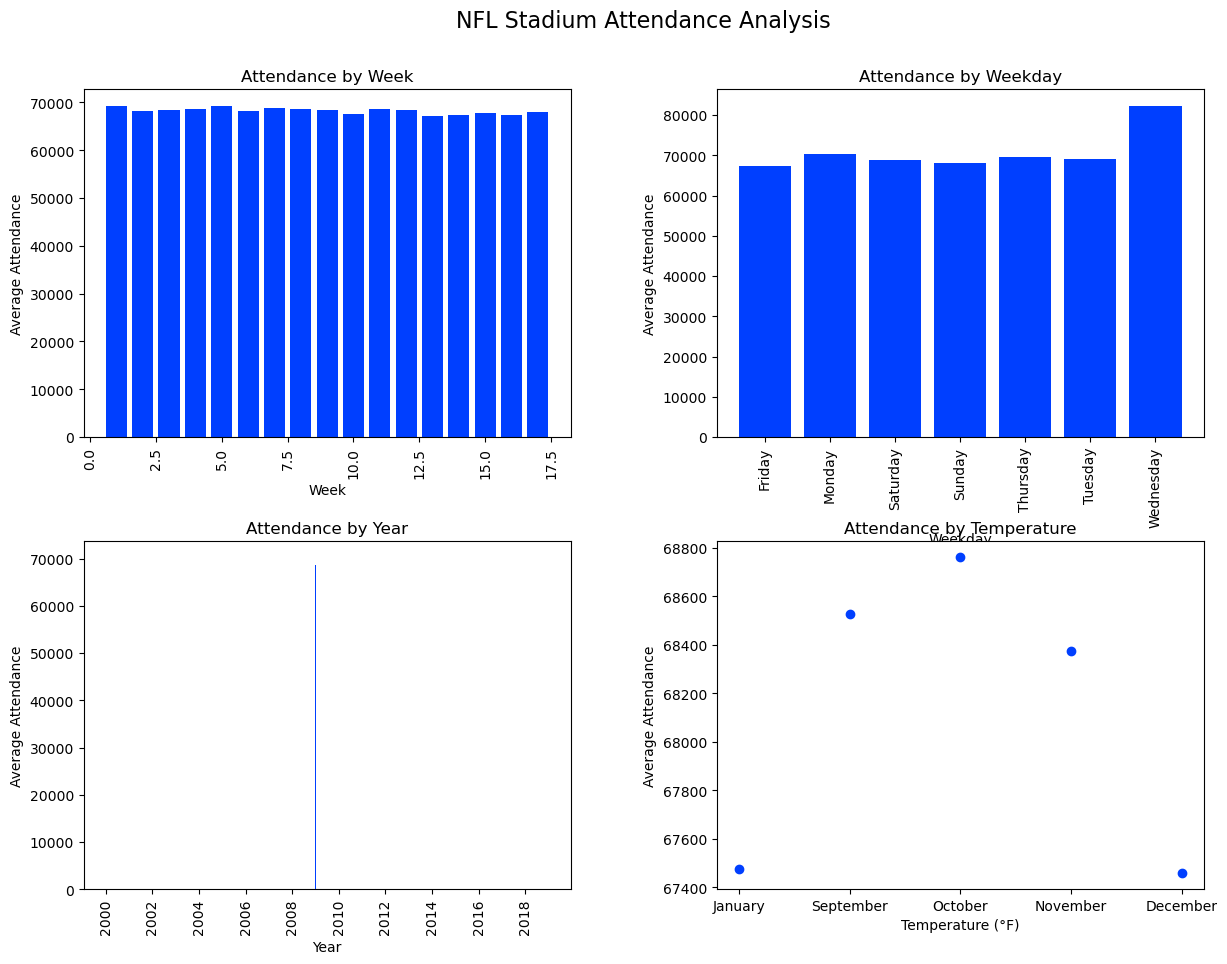

In [76]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('NFL Stadium Attendance Analysis', fontsize=16)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)

# Plotting attendance by week
axes[0, 0].bar(week_counts["week"], week_counts["Average Attendance"])
axes[0, 0].tick_params(axis='x', rotation=90)
axes[0, 0].set_title('Attendance by Week')
axes[0, 0].set_ylabel('Average Attendance')
axes[0, 0].set_xlabel('Week')

# Plotting attendance by weekday
axes[0, 1].bar(weekday_counts["weekday"], weekday_counts["Average Attendance"])
axes[0, 1].tick_params(axis='x', rotation=90)
axes[0, 1].set_title('Attendance by Weekday')
axes[0, 1].set_ylabel('Average Attendance')
axes[0, 1].set_xlabel('Weekday')

# Plotting attendance by year
axes[1, 0].bar(year_counts["season"], year_counts["Average Attendance"])
axes[1, 0].tick_params(axis='x', rotation=90)
axes[1, 0].set_title('Attendance by Year')
axes[1, 0].set_ylabel('Average Attendance')
axes[1, 0].set_xlabel('Year')

# Plotting attendance by temperature
axes[1, 1].scatter(month_counts["month"], month_counts["Average Attendance"])
axes[1, 1].set_title('Attendance by Temperature')
axes[1, 1].set_ylabel('Average Attendance')
axes[1, 1].set_xlabel('Temperature (°F)')

plt.show()

In [47]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   game_id            4520 non-null   object 
 1   season             4520 non-null   int64  
 2   week               4520 non-null   int64  
 3   gameday            4520 non-null   object 
 4   weekday            4520 non-null   object 
 5   wind               3389 non-null   float64
 6   temp               3389 non-null   float64
 7   home_team          4520 non-null   object 
 8   away_team          4520 non-null   object 
 9   home_score         4520 non-null   float64
 10  away_score         4520 non-null   float64
 11  stadium            4520 non-null   object 
 12  team               4520 non-null   object 
 13  team_name          4520 non-null   object 
 14  weekly_attendance  4520 non-null   float64
 15  last_name          4520 non-null   object 
 16  team_abbr          4520 

In [78]:
result

game_id     season  week    gameday weekday  wind  temp  \
0      2000_01_SF_ATL 2000-01-01     1 2000-09-03  Sunday   NaN   NaN   
1     2000_01_JAX_CLE 2000-01-01     1 2000-09-03  Sunday   6.0  78.0   
2      2000_01_IND_KC 2000-01-01     1 2000-09-03  Sunday   5.0  90.0   
3     2000_01_CHI_MIN 2000-01-01     1 2000-09-03  Sunday   NaN   NaN   
4       2000_01_TB_NE 2000-01-01     1 2000-09-03  Sunday   5.0  71.0   
...               ...        ...   ...        ...     ...   ...   ...   
4515  2019_17_TEN_HOU 2019-01-01    17 2019-12-29  Sunday   NaN   NaN   
4516  2019_17_IND_JAX 2019-01-01    17 2019-12-29  Sunday   NaN   NaN   
4517   2019_17_ARI_LA 2019-01-01    17 2019-12-29  Sunday   0.0  62.0   
4518  2019_17_PHI_NYG 2019-01-01    17 2019-12-29  Sunday   5.0  42.0   
4519   2019_17_SF_SEA 2019-01-01    17 2019-12-29  Sunday   3.0  51.0   

     home_team away_team  home_score  ...  team_name weekly_attendance  \
0          ATL        SF        36.0  ...    Falcons           54626.0   
1          CLE       JAX         7.0  ...     Browns           72418.0   
2           KC       IND        14.0  ...     Chiefs           78357.0   
3          MIN       CHI        30.0  ...    Vikings           64104.0   
4           NE        TB        16.0  ...   Patriots           60292.0   
...        ...       ...         ...  ...        ...               ...   
4515       HOU       TEN        14.0  ...     Texans           71794.0   
4516       JAX       IND        38.0  ...    Jaguars           58472.0   
4517        LA       ARI        31.0  ...       Rams           68665.0   
4518       NYG       PHI        17.0  ...     Giants           75029.0   
4519       SEA        SF        21.0  ...   Seahawks           69162.0   

     last_name team_abbr      Team   longitude   latitude winning_team  \
0      Falcons       ATL   Falcons  -84.400972  33.757614          ATL   
1       Browns       CLE    Browns  -81.699564  41.506022          JAX   
2       Chiefs        KC    Chiefs  -94.484039  39.048914          IND   
3      Vikings       MIN   Vikings  -93.258094  44.973881          MIN   
4     Patriots        NE  Patriots  -71.264350  42.090925           TB   
...        ...       ...       ...         ...        ...          ...   
4515    Texans       HOU    Texans  -95.410956  29.684781          TEN   
4516   Jaguars       JAX   Jaguars  -81.637356  30.323925          JAX   
4517      Rams        LA      Rams  -90.188547  38.632975           LA   
4518    Giants       NYG    Giants  -74.076983  40.812194          PHI   
4519  Seahawks       SEA  Seahawks -122.331625  47.595153           SF   

      home_team_win      month  
0              True  September  
1             False  September  
2             False  September  
3              True  September  
4             False  September  
...             ...        ...  
4515          False   December  
4516           True   December  
4517           True   December  
4518          False   December  
4519          False   December  

[4520 rows x 23 columns]

In [34]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, FactorRange, CDSView, BooleanFilter, Select
from bokeh.models import FactorRange
from bokeh.models import Legend
from bokeh.palettes import Category20
from bokeh.layouts import column
from bokeh.transform import factor_cmap
from bokeh.io import curdoc